<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Mathematical_Theory_of_Optimization/blob/main/NumPy_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining a vector

A vector is just a collection of variables or values arranged as a column matrix. For example,

$\bar{a}  = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ is a constant vector whereas $\bar{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$ is a variable vector.

Now, lets see how we can define a constant vector in Python.

In [1]:
# We can define a constant vector using a Python list
list_vec = [1, 2, 3]
print(list_vec)

[1, 2, 3]


The vector is currently a row vector unlike our studied column vectors. Its still okay as long as we adjust our functions.

Now lets try multiplying our vector with a scalar -

$\lambda \cdot \bar{a}  = \begin{bmatrix} \lambda \\ 2\lambda \\ 3\lambda \end{bmatrix}$

In [2]:
scalar = 3

direct_mul = scalar*list_vec
print("Result for multiplying a vector defined as a list directly with a scalar - \n")
print(direct_mul)

proper_mul = [scalar*i for i in list_vec]
print("\nResult for multiplying a vector defined as a list with a scalar by iterating over each element - \n")
print(proper_mul)

Result for multiplying a vector defined as a list directly with a scalar - 

[1, 2, 3, 1, 2, 3, 1, 2, 3]

Result for multiplying a vector defined as a list with a scalar by iterating over each element - 

[3, 6, 9]


This is one of the problems with Python lists. Python lists are non-homogenous in nature. They allow you to store different types of objects together. As such, they require more memory to initiate and they do not support elementwise operations.

Lets test one more case of adding two vectors -

In [3]:
a = [1, 2, 3]
b = [4, 5, 6]

print("Result of directly adding two list vectors - \n")
print(a+b)

print("\nResult of adding two list vectors by iterating over each element - \n")
print([a[i]+b[i] for i in range(len(a))])

Result of directly adding two list vectors - 

[1, 2, 3, 4, 5, 6]

Result of adding two list vectors by iterating over each element - 

[5, 7, 9]


Instead of making our lives hard using lists, we will use NumPy arrays instead. NumPy arrays provide WAY more functionalities compared to lists.

In [4]:
import numpy as np

vec = np.array([1, 2, 3])
print(vec)

[1 2 3]


Now lets try multiplying the NumPy vector using a scalar and see the difference.

In [5]:
scalar = 3

print(scalar*vec)

[3 6 9]


Its more natural compared to the list vector.

Now lets try adding two NumPy vectors -

In [6]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a+b)

[5 7 9]


With these basic operations covered, lets move on to more complex operations.

## Vector inner product/ Dot product

### Implementation

For $\bar{a}  = \begin{bmatrix} a_1 \\ a_2 \\ . \\ . \\ . \\ a_n \end{bmatrix}$ and $\bar{b}  = \begin{bmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{bmatrix}$,

\\


$<\bar{a}, \bar{b}> = \bar{a}\cdot\bar{b} = \bar{a}^T\bar{b} = \sum_{i=1}^{n} a_i * b_i$

\\

Then if, $\bar{a}  = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ and $\bar{b}  = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$,

$<\bar{a}, \bar{b}> = 1*4 + 2*5 + 3*6 = 32$

We will implement this using $\bar{A}^T\bar{B}$ to find the dot product first. In NumPy, transpose can be taken on a vector or a matrix by doing `array.T`. However, for compression, NumPy squeezes axes with dim = 1. Hence taking transpose over these vectors don't change anything. For example -

In [7]:
a = np.array([1, 2, 3])

print(a.shape)
print(a.T.shape)

(3,)
(3,)


So, instead, use `array.reshape()` to get the desired dimensionality -

In [8]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a.reshape(1,3)@b.reshape(3,1))

[[32]]


There is one elegant way to do the same thing - using the `np.inner()` function.

In [10]:
d = np.array([1, 2, 3])
e = np.array([4, 5, 6])

In [11]:
print(np.inner(d, e))

32


We will not use the summation method for inner product.

### Verification of inner product properties

We will verify 3 inner product properties -

1.   $<\bar{x}, \bar{y} + \bar{z}> = <\bar{x}, \bar{y}> + <\bar{x}, \bar{z}>$
2.   $<\bar{x}, \bar{y}> = <\bar{y}, \bar{x}>$
3.   $<\lambda \bar{x}, \bar{y}> = \lambda <\bar{x}, \bar{y}>$

First one is done for you. Do the rest two.

In [12]:
# property 1

# use random 3D vectors
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))
z = np.random.randint(10, size=(3))

print("x ->", x)
print("y ->", y)
print("z ->", z)

print("\ninner(x, y + z) -> ", np.inner(x, y+z))
print("inner(x, y) + inner(x, z) -> ", np.inner(x, y) + np.inner(x, z))

print("\nEquality test -> ", np.inner(x, y+z) == np.inner(x, y) + np.inner(x, z))

x -> [8 9 7]
y -> [3 5 1]
z -> [0 7 4]

inner(x, y + z) ->  167
inner(x, y) + inner(x, z) ->  167

Equality test ->  True


In [14]:
# property 2

# use random 3D vectors
# replace the None with your code
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))

print("x ->", x)
print("y ->", y)

print("\ninner(x, y) -> ", np.inner(x,y))
print("inner(y, x) -> ", np.inner(y,x))

print("\nEquality test -> ", np.inner(x,y)==np.inner(y,x))

x -> [4 5 7]
y -> [7 7 0]

inner(x, y) ->  63
inner(y, x) ->  63

Equality test ->  True


In [15]:
# property 3

# use random 3D vectors
# replace the None with your code
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))

# use random 1D scalar
scalar = np.random.randint(10)

print("x ->", x)
print("y ->", y)
print("scalar ->", scalar)

print("\ninner(scalar*x, y) -> ", np.inner(scalar*x, y))
print("scalar*inner(y, x) -> ", np.inner(scalar, np.inner(x, y)))

print("\nEquality test -> ", np.inner(scalar*x, y)==np.inner(scalar, np.inner(x, y)))

x -> [9 5 4]
y -> [3 1 4]
scalar -> 5

inner(scalar*x, y) ->  240
scalar*inner(y, x) ->  240

Equality test ->  True


## Outer product / Cross product

For $\bar{a}  = \begin{bmatrix} a_1 \\ a_2 \\ . \\ . \\ . \\ a_m \end{bmatrix}$ and $\bar{b}  = \begin{bmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{bmatrix}$,

\\


$|\bar{a}>< \bar{b}| = \bar{a}\otimes\bar{b} = \bar{a}\bar{b}^T = \begin{bmatrix}
a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
\vdots & \vdots & \ddots & \vdots \\
a_m b_1 & a_m b_2 & \cdots & a_m b_n
\end{bmatrix}
$

\\

Then if, $\bar{a}  = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$ and $\bar{b}  = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$,

\\

$\bar{a}\otimes\bar{b} = \begin{bmatrix}
1*4 & 1*5 & 1*6 \\
2*4 & 2*5 & 2*6 \\
3*4 & 3*5 & 3*6 \\
\end{bmatrix} = \begin{bmatrix}
4 & 5 & 6 \\
8 & 10 & 12 \\
12 & 15 & 18 \\
\end{bmatrix}$

At first lets find the outer product using $\bar{a}\bar{b}^T$ -

In [16]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a.reshape(3,1)@b.reshape(1, 3))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


Now lets use the `np.outer()` function -

In [17]:
print(np.outer(a,b))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


### Verification of outer product properties

We will verify 3 properties -

1.   $(\bar{x} \otimes \bar{y})^T = \bar{y} \otimes \bar{x}$
2.   $(\bar{x} + \bar{y}) \otimes \bar{z} = \bar{x}\otimes \bar{z} + \bar{y}\otimes \bar{z}$
3.   $\bar{x}\otimes (\bar{y} + \bar{z}) = \bar{x}\otimes \bar{y} + \bar{x} \otimes \bar{z}$

First one is done for you. Do the rest two.

In [18]:
# property 1

# use random 3D vectors
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))

print("x ->", x)
print("y ->", y)

print("\nouter(x,y)^T -> ", np.outer(x, y).T)
print("outer(y,x) -> ", np.outer(y, x))

print("\nEquality test -> ", (np.outer(x, y).T == np.outer(y, x)).all())

x -> [3 0 7]
y -> [0 6 2]

outer(x,y)^T ->  [[ 0  0  0]
 [18  0 42]
 [ 6  0 14]]
outer(y,x) ->  [[ 0  0  0]
 [18  0 42]
 [ 6  0 14]]

Equality test ->  True


In [22]:
# property 2

# use random 3D vectors
# replace the None with your code
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))
z = np.random.randint(10, size=(3))

print("x ->", x)
print("y ->", y)
print("z ->", z)

print("\nouter(x + y, z) -> ", np.outer(x+y, z))
print("outer(x, z) + outer(y, z) -> ", np.outer(x, z) + np.outer(y, z))



#remember to use the .all() function
print("\nEquality test -> ", (np.outer(x+y, z)==np.outer(x, z) + np.outer(y, z)).all())

x -> [5 8 3]
y -> [3 0 3]
z -> [3 1 1]

outer(x + y, z) ->  [[24  8  8]
 [24  8  8]
 [18  6  6]]
outer(x, z) + outer(y, z) ->  [[24  8  8]
 [24  8  8]
 [18  6  6]]

Equality test ->  True


In [23]:
# property 3

# use random 3D vectors
# replace the None with your code
x = np.random.randint(10, size=(3))
y = np.random.randint(10, size=(3))
z = np.random.randint(10, size=(3))

print("x ->", x)
print("y ->", y)
print("z ->", z)

print("\nouter(x, y + z) -> ", np.outer(x, y+z))
print("outer(x, y) + outer(x, z) -> ", np.outer(x, y) + np.outer(x, z))

#remember to use the .all() function
print("\nEquality test -> ", (np.outer(x, y+z)==np.outer(x, y) + np.outer(x, z)).all())

x -> [0 0 1]
y -> [5 1 7]
z -> [8 4 9]

outer(x, y + z) ->  [[ 0  0  0]
 [ 0  0  0]
 [13  5 16]]
outer(x, y) + outer(x, z) ->  [[ 0  0  0]
 [ 0  0  0]
 [13  5 16]]

Equality test ->  True


### Matrix multiplication reparameterization using outer product

If $A_{N \times M}$ and $B_{M \times K}$ are two matrices,

$A\cdot B = \begin{bmatrix} [A_1^c] & [A_2^c] & \cdots & [A_M^c] \end{bmatrix} \cdot \begin{bmatrix} [B_1^r] \\ [_B2^r] \\ \vdots \\ [B_M^r] \end{bmatrix} = \sum_{i=1}^{M} [A_i^c]\otimes [B_i^r]$

You can manually prove it by working on it a bit. Let us verify it out with random matrices.

In [24]:
n = 3
m = 2
k = 4

a = np.random.randint(25, size = (n, m))
b = np.random.randint(25, size = (m, k))

print("a ->\n", a)
print("\nb ->\n", b)

c_original = a@b

print("\nDirect multiplication ->\n", c_original)

c_test = np.zeros_like(c_original)

for i in range(m):
    c_test += np.outer(a[:, i], b[i, :])

print("\nReparameterized multiplication ->\n", c_test)

print("\nTest case same? -> ", (c_original == c_test).all())

a ->
 [[22 21]
 [11  7]
 [ 3 20]]

b ->
 [[10 23 16 10]
 [ 2 17 22 19]]

Direct multiplication ->
 [[262 863 814 619]
 [124 372 330 243]
 [ 70 409 488 410]]

Reparameterized multiplication ->
 [[262 863 814 619]
 [124 372 330 243]
 [ 70 409 488 410]]

Test case same? ->  True


## Norm of a vector

NumPy has a direct function to find out the norm of a vector - `np.linalg.norm()`. The function takes an `order` argument that decides which norm to find out. Lets take a random vector and figure out a range of norms.

In [26]:
p = np.linspace(0.5, 5, 100)

norms = np.zeros_like(p)
a = np.random.randint(10, size=(2))

for i in range(len(p)):
    norms[i] = np.linalg.norm(a, ord=p[i])

Now lets visualize the norms in a plot -

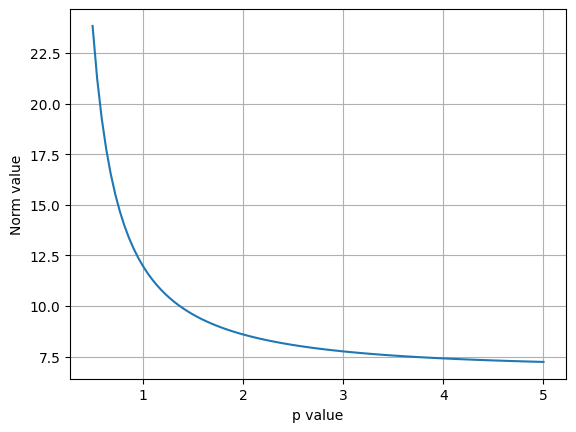

In [27]:
import matplotlib.pyplot as plt

plt.plot(p, norms)
plt.grid(True)
plt.xlabel("p value")
plt.ylabel("Norm value")
plt.show();

So, it can be seen that higher the norm order, lower the norm values for a static vector. It then implies that to maintain an equal norm across an increasing order, the vector size has to increase -

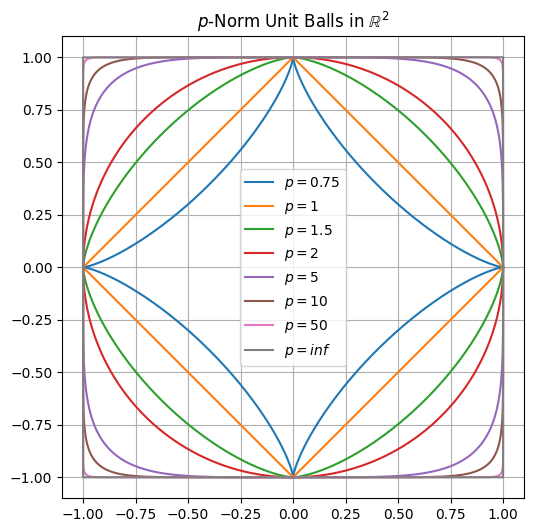

In [28]:
# Values of p to visualize
p_values = [0.75, 1, 1.5, 2, 5, 10, 50, np.inf]
theta = np.linspace(0, 2*np.pi, 10000)

def lp_unit_circle(p):
    # Generate points on the unit Lp norm "circle"
    x = np.cos(theta)
    y = np.sin(theta)
    norm = np.linalg.norm(np.array([x,y]), axis = 0, ord=p)
    return x / norm, y / norm

plt.figure(figsize=(6, 6))

for p in p_values:
    x, y = lp_unit_circle(p)
    plt.plot(x, y, label=fr'$p={p}$')

plt.gca().set_aspect('equal')
plt.title(r'$p$-Norm Unit Balls in $\mathbb{R}^2$')
plt.legend()
plt.grid(True)
plt.show()

So, what is going on in this implementation?

We are basically drawing unit vectors for various norms. We know -

$\hat{u}_p = \frac{\bar{u}}{||u||_p}$

We want our unit vectors to cover whole 360 degrees forming a circle in $p$-norm. Since, we are in $\mathbb{R}^2$, we can break any random vector $\bar{u}$ as -

$\bar{u} = \begin{bmatrix} \bar{x} \\ \bar{y} \end{bmatrix} = \begin{bmatrix} ||\bar{u}||_p\cdot cos\theta \cdot \hat{x}_p  \\ ||\bar{u}||_p\cdot sin\theta \cdot \hat{y}_p \end{bmatrix}$ where, $\hat{x}_p$ and $\hat{y}_p$ are unit vectors in x and y axis under $p$-norms.

Then, $\frac{\bar{u}}{||\bar{u}||_p} = \begin{bmatrix} cos\theta \cdot \hat{x}_p  \\ sin\theta \cdot \hat{y}_p \end{bmatrix} = \hat{u}_p$

Now this formulation allows us to rotate the unit vector 360 degrees and span the $p$-norm = 1 balls.

### Triangle inequality of norms

Triangle inequality states that if $\bar{a}$ and $\bar{b}$ are two vectors, then -

$||\bar{a} + \bar{b}|| \le ||\bar{a}|| + ||\bar{b}||$

Lets try it out with random vectors and random $p$ value.

In [29]:
a = np.random.randint(10, size=(3))
b = np.random.randint(10, size=(3))
p = np.random.randint(10)

print("a ->", a)
print("b ->", b)
print("p ->", p)

print("\n||a + b|| -> ", np.linalg.norm(a+b, ord=p))
print("||a|| + ||b|| -> ", np.linalg.norm(a, ord=p) + np.linalg.norm(b, ord=p))

print("\nTriangle inequality satisfied? -> ", np.linalg.norm(a+b, ord=p) <= np.linalg.norm(a, ord=p) + np.linalg.norm(b, ord=p))

a -> [9 3 5]
b -> [3 1 8]
p -> 7

||a + b|| ->  13.866930713374375
||a|| + ||b|| ->  17.02262681280756

Triangle inequality satisfied? ->  True


## Eigenvalues and eigenvectors

For this course it is important to find the eigenvalues and eigenvectors of matrices. We can do this simply using `np.linalg.eig()`. Lets define a symmetric matrix -

$M = \begin{bmatrix} 1 & 3 & 4 \\
3 & 2 & 6 \\
4 & 6 & 7\end{bmatrix}$

In [30]:
m = np.array([[1, 3, 4],
              [3, 2, 6],
              [4, 6, 7]])

eigvals, eigvecs = np.linalg.eig(m)

In [31]:
for i in range(len(eigvals)):
    print("Eigen value - ", eigvals[i])
    print("Eigen vector - ", eigvecs[:,i])

Eigen value -  13.066372975210776
Eigen vector -  [0.38243601 0.51837582 0.76487202]
Eigen value -  -0.9999999999999991
Eigen vector -  [ 8.94427191e-01 -6.69010419e-16 -4.47213595e-01]
Eigen value -  -2.0663729752107782
Eigen vector -  [ 0.23182471 -0.85515292  0.46364943]


It is to be noted that the algorithm used to find these eigenvalues and eigenvectors is a numerical algorithm and as such, they may not be equal to theoretical values, but they will be very close.

We will use eigenvalues to test matrix definiteness. For a matrix $M$ having eigenvalues $λ = [λ_1, λ_2, . . ., λ_n]$, iff -

1.  $∀λ \in \mathbb{R_{++}}, M \succ 0$ [Positive definite]
2.  $∀λ \in \mathbb{R_{+}}, M \succeq 0$ [Positive semi-definite]
3.  $∃λ_i \in \mathbb{R_{++}}$ and $∃λ_j \in \mathbb{R_{--}}$ such that $λ_i \neq λ_j$, then $M$ is indefinite
4.  $∀λ \in \mathbb{R_{-}}, M \preccurlyeq 0$ [Negative semi-definite]
5.  $∀λ \in \mathbb{R_{--}}, M \prec 0$ [Negative definite]

What is type of matrix is the given symmetric matrix?

*Answer -*

For a symmetric matrix, the eigenvectors should be orthogonal if the eigenvalues are distinct. Lets verify this theory now for any two random eigenvectors -

In [32]:
ind_a, ind_b = np.random.choice(np.arange(eigvecs.shape[0]), size = 2, replace = False)

a = eigvecs[ind_a]
b = eigvecs[ind_b]

print(np.inner(a,b))

-4.163336342344337e-16


Although the value is not exactly 0, but it is very close to 0. And so we can assume these 2 vectors to be orthogonal.

You can try out other combinations as well.

Now take a random symmetric matrix prepared from your ID and mention what type of matrix it is in terms of definiteness.

In [33]:
N = 10

#enter your id in random.seed()
np.random.seed(123)

a = np.random.randint(-50,50,size=(N,N))
your_mat = (a + a.T)//2

print(your_mat)

[[ 16  32  33 -11   8 -17  33  11  20  18]
 [ 32 -18  -3  22  11   2  -8  -7  22  39]
 [ 33  -3   5 -13 -11  30 -24  25  20 -25]
 [-11  22 -13  49  16 -15  36  20  42 -31]
 [  8  11 -11  16 -47  -8   9  12  -9 -20]
 [-17   2  30 -15  -8 -23   0 -18  28  10]
 [ 33  -8 -24  36   9   0 -49 -20 -20 -20]
 [ 11  -7  25  20  12 -18 -20  31 -16 -20]
 [ 20  22  20  42  -9  28 -20 -16 -39   4]
 [ 18  39 -25 -31 -20  10 -20 -20   4 -36]]


In [35]:


#finish the code
eigvals, _ = None

for i in range(len(eigvals)):
    print(eigvals[i])

TypeError: cannot unpack non-iterable NoneType object

By visual inspection, write the type of matrix -

*Answer -*

In [ ]:
### write a code to automate the process
### assume your input will always be a symmetric matrix (real eigenvalues)
### test your code using your matrix


### code ends